In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## Neural Network Optimization
### Neural Network: from application to model:
- our model (Fully connected neural networks / Deep Feedforward Networks/ Multi-layer perceptrons MLPs ):
    $$\left\{\begin{aligned}
        h_0 &= x \in \mathbb R^{d_0}, \\
        h_1 &= \sigma_1(W_1 h_0 + b_1),\\
         &\cdots\\
         h_{i+1}&= \sigma_i(W_{i+1} h_i + b_{i+1}),\\
         &\cdots\\
         h_{k}&= \sigma_{k-1}(W_k h_{k-1} + b_k),\\
         f &= h_k.
         \end{aligned}\right.$$
- and in general $f$ can be written as $f(\theta, x)$, where $\theta =\{W_i, b_i \}$ includes all the parameters, with $ W_i \in \mathbb R^{d_{i} \times d_{i-1}}$ and $ b_i \in \mathbb R^{d_{i}}, i = 0, 1, \dots, k.$


### Statistics: from sample space to data set
- For supervised learning problem especially, for each data point $(x, y)$ from the sample space, we can define a loss of the following form :
$$ L(\theta; x, y) = \text{loss}(f(\theta,x), y)$$
                  
- Our final goal is to find the model with the best $\theta$ that work well on average across the whole sample space: 
$$\begin{aligned} \theta^* &= \arg\min_{\theta} J(\theta) \\
 & =\arg\min_{\theta} E_{(x,y)\sim P(x,y)} \,L(\theta; x, y)\\
 &=\arg\min \int L(\theta; x, y) P(x, y) dxdy \\
 \end{aligned}. $$ 
- however, since we only have limited samples of the sample space, the object function we can optimize is acutually an approximation of the true function we intend to optimize. 
- given $n$ data samples $\boldsymbol{X} = (\boldsymbol{x_1},\boldsymbol{x_2},\dots,\boldsymbol{x_n})^T$ and $\boldsymbol{y}=(y_1,y_2,\dots, y_n)^T$, we are able to approximate $J(\theta)$ by: 
$$\begin{aligned} \hat {J}(\theta) &= \frac{1}{N}\sum \limits_{i=1}^n L(\theta; x_i, y_i)\\
                        & = \frac{1}{N} \boldsymbol{L}(\theta,\boldsymbol{X}, \boldsymbol{y})^T\boldsymbol{1_n}
\end{aligned}$$ 
where $J(\theta)$ is called generalization error while $\hat J(\theta)$ is called training error.

### Stop criteron: the key differences
- Above approximatoin results in the key differences between the true optimization for machine learning problems and the other optimization problems. 
    - minimizing $\hat J(\theta)$ does not always contribute to minimizing our true $J(\theta)$ 
    - a cretiron that minimizing $\hat J(\theta)$ remains to be effective can be given by $\hat J(\theta)\geq J(\theta)$
        - $J(\theta)$ can be estimated based on new samples. Regarding a validation set as these "new" samples gives the early stop criteron for neural network optimization:

![title](img/early_stoping.png "early stoping, from deep learning book Chap.7")

- Also by $\hat J(\theta)\geq J(\theta) \geq J(\theta^*) = M$, we learn roughly that it is totally useless for machine learning optimization problems to minize the loss under a certain constant.

![title](img/fig_1.png)


- optimization for neural network can stop even when the gradient is still large.

### Other features: advantages and difficulties 
- recall the object function to minimize:
$$\begin{aligned} \hat {J}(\theta) &= \frac{1}{N}\sum \limits_{i=1}^n L(\theta; x_i, y_i)\\
                        & = \frac{1}{N} \boldsymbol{L}(\theta,\boldsymbol{X}, \boldsymbol{y})^T\boldsymbol{1_n}\\
                        & = \frac{1}{N} \textbf{loss}\big(f(\theta,\boldsymbol{X}), \boldsymbol{y}\big)^T\boldsymbol{1_n}\
\end{aligned}$$ 
where $\boldsymbol{X} = (\boldsymbol{x_1},\boldsymbol{x_2},\dots,\boldsymbol{x_n})^T$ and $\boldsymbol{y}=(y_1,y_2,\dots, y_n)^T$, 
and our $\boldsymbol{f}(\theta,\boldsymbol{X})$ becomes:

    $$\left\{\begin{aligned}
        \boldsymbol{h_0} &= \boldsymbol{X} \in R^{n\times d_0}, \\
        \boldsymbol{h_1} &= \sigma_1(\boldsymbol{h_0} W_1^T + \boldsymbol{1_n}b_1^T),\\
         &\cdots\\
         \boldsymbol{h_{i+1}}&= \sigma_i( \boldsymbol{h_i}W_{i+1}^T +\boldsymbol{1_n} b_{i+1}^T),\\
         &\cdots\\
         \boldsymbol{h_{k}}&= \sigma_{k-1}(\boldsymbol{h_{k-1}}W_k^T  + \boldsymbol{1_n}b_k^T),\\
         \boldsymbol{f} &= \boldsymbol{h_k}.
         \end{aligned}\right.$$


- advantages:
    - object function of the above form can benefit from parallel computing.
    - the comptutaion only involves matrix multiplication and some element wise operations => GPU 
    
- Main difficulty:
    - large $N$, a big data set.
        - evaluate the object function and its gradient would cost a lot of time already. 
    - large set of $\theta$ 
        - second order method that require Hessian would be inconvenient or impractical.
    - divesity of data set $\boldsymbol{X, y}$ and model
        - People are trying to apply deep learning model to solve problems from different areas, Computer Vision( image and video), Natural language processing(text), Speech recognition(audio), Science, e.g. Bioinformatics(gene sequences), Artificail Intelligence (playing chess, driving cars), Commercial use (Recommendation systems, data from customs), the loss function from different areas may show diverse property. 
        - Different nerual networks are designed specially for different area, while the optimization algorithms are not.  
        
- solutions:
    - large $N$, a big data set.
        - use stochastic optimization methods: accelarate the computation of the object function and its gradient at the cost of losing some accuracy 
    - large set of $\theta$ 
        - focus on first order method.
    - divesity of data set $\boldsymbol{X, y}$ and model
        - find adaptive algorithms
  

- Other difficulties:
    - for extremely "deep" neural networks: long time dependencies.
        - The vanishing and exploding gradient problem 
    - difficulties for non-convex optimization problem

### Mini-batch stochastic gradient descent: the trade off

- For $\hat J(\theta;X, y) = \frac{1}{n} \sum \limits_{i=1}^n L(\theta; x_i, y_i)$ 
    - it is resonable to use only the mean of loss over a randomly drawn subset of the data set as a good estimation of $\hat J$ by:
        - $\hat J_{S} =  \frac{1}{|S|} \sum \limits_{i \in S} L(\theta; x_i, y_i), $ where $S\subseteq \{1,2, \dots, n\}$ 
    - for batch method, $S=\{1,2,\dots,n\}$, we use the whole data set and get the exact result.
    - for stochastic method, only one randomly drawn data point is used: $\hat J_S = L(\theta; x_i, y_i), 1 \leq i \leq n$, this is also the case for online learning, where we can only get one data point at a time, and every data point will be disgarded after training.  
    - for mini-batch method, we have a batchsize $|S| = m < n$,  So mini-batch turns out to be a hybrid between the pure " stochastic"(m = 1) method and the whole "batch"(m = n) method. 
    
    
#### stochastic / mini-batch gradient descent 

- denote $g(\theta; X, y) = \nabla_\theta \hat J(\theta;X, y) = \frac{1}{n} \sum \limits_{i=1}^n \nabla_\theta L(\theta; x_i, y_i) $, above method can also apply to evaluate the gradient $g$ by using its approximation $g_S$ 
- applying this strategy to gradient descent method gives the stochastic / mini-batch gradient descent method (SGD)

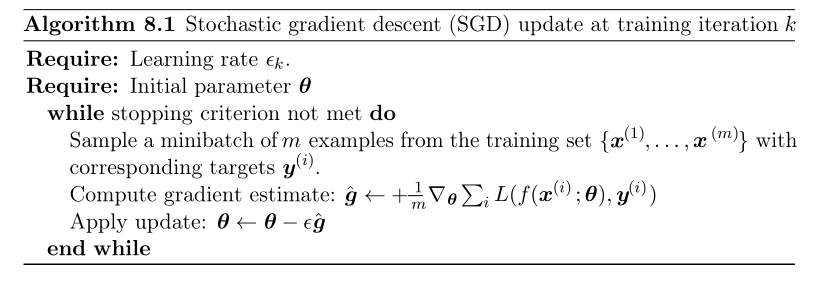

#### Advantages of Mini-batch method
- better than batch
    - better **performance** with the same computing power:  Larger batches provide a more accurate estimate of the gradient, but with less than linear returns. 
        - 100 update with inexact gradient versus 1 update with exact gradient 
        - However, a paper named "Don't decay the learning rate, increase the batch size" from google argues that the benefit from larger batch size may count as the iterations increase   

    - **noisiness** isn't all that bad.  
        - suitable noisiness may enable the iterate jump out of saddle or some local minimum.
    - **data redundancy**
- better than stochastic method using only one data point
    - due to hardware, multicore architectures. This motivates using some absolute minimum batch size. Power of 2 batch sizes is recommended. 



- We will assume to have applied mini-batch method for all the following text and use $g$ instead of $g_S$ by default. 


### SGD: effectiveness and drawback 

- stochastic gradient descend 
    - Robbins, H.; Monro, S. (1951).  "A Stochastic Approximation Method". The Annals of Mathematical Statistics. gives an criterion to choose the learning rate $\epsilon_k$
        - $\sum \limits_{k=1}^{\infty} \epsilon_k^2 < \infty$ 
    - in practice, how to anneal $\epsilon_k$ differs
        - Most popular one: set $\epsilon \leftarrow \alpha \epsilon $ by a constant $\alpha$ after $n_k$ iterations 
        
- choosing a suitable learning rate and decay is hard which is the key problem for SGD.
    - I will show this by some simple numerical exiperiments below   

In [2]:
import optimizer
import numpy as np
import matplotlib.pyplot as plt

In [3]:
f = lambda x :  0.5 * x * x 
g = lambda x :  x

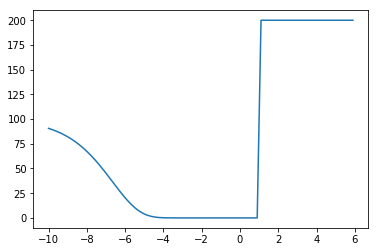

In [4]:
step_sizes = 2.0**np.arange(-10,6,0.1) # from 0.001 to 64 
final_x = np.zeros(step_sizes.shape)
for i,step in enumerate(step_sizes):
    opt = optimizer.GradientDescent(f = f, g = g, x0 = 100.0, step_size = step, max_iter = 100)
    x = np.abs(opt.minimize())
    final_x[i] = x if x < 200 else 200
plt.plot(np.log(step_sizes)/np.log(2), final_x)
plt.show()

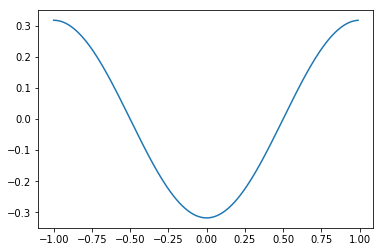

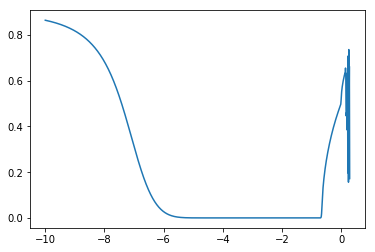

In [5]:
f = lambda x :  - np.cos(np.pi*x) / np.pi
g = lambda x :  np.sin(np.pi * x)

a= np.arange(-1,1,.01)
plt.plot(a, f(a))
plt.show()

step_sizes = 2.0**np.arange(-10,0.3,0.01)
final_x = np.zeros(step_sizes.shape)
for i,step in enumerate(step_sizes):
    opt = optimizer.GradientDescent(\
        f = f, g = g, x0 = .9, step_size = step, max_iter = 100)
    x = np.abs(opt.minimize())
    final_x[i] = x if x < 200 else 200
plt.plot(np.log(step_sizes)/np.log(2), final_x)
plt.show()

In [6]:
# the critical point is L = 2/pi
L = 2/np.pi
print("L",L)
opt1 = optimizer.GradientDescent(\
    f = f, g = g, x0 = 0.9, step_size = 0.63, max_iter = 1000)
opt2 = optimizer.GradientDescent(\
    f = f, g = g, x0 = 0.9, step_size = 0.64, max_iter = 1000)
x1 = opt1.minimize()
x2 = opt2.minimize()
print("step_size 0.63:",x1)
print("step_size 0.64:",x2)

L 0.6366197723675814
step_size 0.63: -5.48839320981919e-11
step_size 0.64: -0.05670917963658573


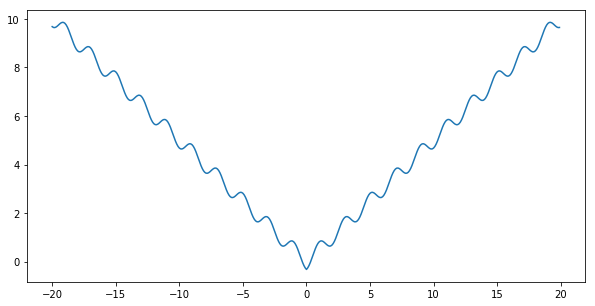

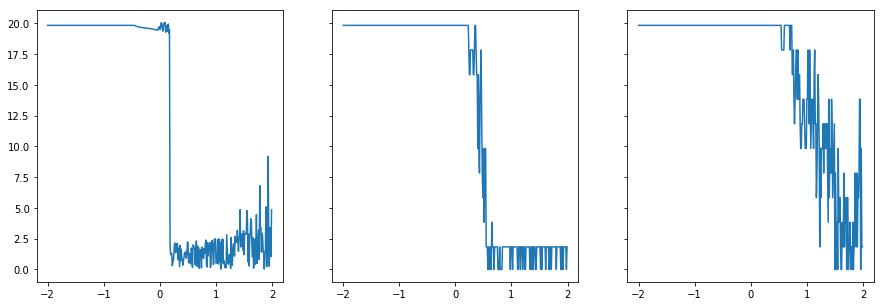

In [7]:
f = lambda x : 0.5 * np.abs(x) - np.cos(np.pi*x) / np.pi
g = lambda x : 0.5 * np.sign(x) +  np.sin(np.pi*x)
a = np.arange(-20, 20, 0.1)
plt.figure(figsize=(10,5)) 
plt.plot(a, f(a))
plt.show()

step_sizes = 2.0**np.arange(-2,2,0.01)
def testDecay(decay, ax):
    final_x = np.zeros(step_sizes.shape)
    for i,step in enumerate(step_sizes):
        opt = optimizer.GradientDescent(\
            f = f, g = g, x0 = 20, step_size = step, max_iter = 1000, decay= decay)
        x = np.abs(opt.minimize())
        final_x[i] = x if x < 500 else 500
    ax.plot(np.log(step_sizes)/np.log(2), final_x)
    

_, ax = plt.subplots(1, 3, sharey=True, figsize=(15,5))
for i,decay in enumerate([0, 0.01, 0.1]):
    testDecay(decay,ax[i])
plt.show()

### accelarate the SGD 

- accelarate the SGD go on two directions:
    - GD: applying the same strategy that could accelerate for original non-stochastic case 
    - S: noise reducing methods

#### Momentum method : discretize from ODE
- (Polyak 1964). Some methods of speeding up the convergence of iteration methods
    - ![title](img/polyak1964.png)


- for an ODE $$\frac{d^2x}{dt^2} = - \alpha \frac{dx}{dt} - \beta g(x)$$
    - physic intepretation: 
        - Newtown's law: $F = m a$,
        - $\frac{d^2x}{dt^2}$, the acceleration $a$
        - $- \alpha \frac{dx}{dt}$, a resistance force propotional to speed
        - $ - \beta g(x)$
            - if $g(x) = \nabla J(x)$
            - $J(x)$ could be viewed as the potiential enengy over $x$, which is the oject function we intend to minimize
            - $-g(x)$ could be viewed as the force from the force field generated by $J$
    - rewrite it by set $v = \frac{dx}{dt}$ get:
         $$\frac{dv}{dt}= -\alpha v - \beta g(x)\\
         \frac{dx}{dt}= v$$
    - discretize it get:
        - $$\frac{v_{t+1}-v_t}{\epsilon} = -\alpha v_t - \beta g(x_t)\\
         \frac{x_{t+1}-x_t}{\epsilon} = v_{t+1}$$
    - that is:
        - $$ v_{t+1} = (1 -\epsilon \alpha) v_t - \epsilon \beta g(x_t)\\
                     x_{t+1} = x_t + \epsilon v_{t+1}$$
    - rescale and set the new constant:
        - $$ v_{t+1} = \alpha v_t - \beta g(x_t)\\
                     x_{t+1} = x_t + v_{t+1}$$ 

![title](img/Momentum.png)


### From momentum method to Nesterov momentum

-  Nesterov, Y. (1983) A Method for Solving a Convex Programming Problem with Convergence Rate O(1/K2) . Soviet Mathematics Doklady, 27, 372-367.



- for $$\frac{dv}{dt}= -\alpha v - \beta g(x)\\
         \frac{dx}{dt}= v$$

    - instead discretize it by:
        $$\frac{v_{t+1}-v_t}{\epsilon} = -\alpha v_t - \beta g(\hat x_{t+1})\\
         \frac{x_{t+1}-x_t}{\epsilon} = v_{t+1},\\ \text{where} \quad \hat x_{t+1} = x_t + (1-\epsilon \alpha ) v_t$$
    

![title](img/NAG.png)

- Ilya Sutskever shows in his thesis "Training a recurrent neural networks" that iterations of this form is equivalent to Nesterov's original one.





### Noise reducing methods

- B. T. Polyak and A. B. Juditsky (1992) Acceleration of Stochastic Approximation by Averaging 
    - if you want to get $x_t$, use the average estimation $\bar x_t = \frac{1}{N} \sum \limits_{i=1}^t x_i$ instead
    
- for neural network opitmizaiton, exponentially decaying running average (or named moving arevage) is typically used:
    - let $\bar x_0 = 0$
    - $$\begin{aligned}\bar x_t &= \alpha \bar x_{t-1} + (1-\alpha) x_t \\
                       &= \alpha^2 \bar x_{t-2} + \alpha (1-\alpha) x_{t-1} + (1-\alpha) x_t\\
                       &= \dots \\
                       &= (1-\alpha)\sum \limits_{i=1}^t \alpha^{t-i} x_i 
    \end{aligned}$$

### Optimizers for programming, deep learning library

![title](img/kerasOptimizer.png)

- Note that the SGD above has already integated the momentum method and nesterov accelerated gradient method.
    - `sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)`



### Adaptive learning rate: using the sign of gradient 

- instead using the gradient directly, just use the sign of gradient to keep the scale of each update uniform (rporp):
    - $x_{t+1} = x_t - \epsilon \frac{g}{\sqrt{g^2 }+ \delta}$
    
- then combine the average stategy to make it stable.
- by apply the adaptive learning rate methods, the performance of algorithm will not be so sensitive to learning rate as SGD does.

![title](img/Adagrad.png)
![title](img/RMSProp.png)
![title](img/AdaDelta.png)

- Note that for running average, the expectation 
    - $$\begin{aligned}E \bar x_t &= \alpha E \bar x_{t-1} + (1-\alpha) E x_t \\
                       &= \alpha^2 \bar x_{t-2} + \alpha (1-\alpha) x_{t-1} + (1-\alpha) x_t\\
                       &= \dots \\
                       &= (1-\alpha)\sum \limits_{i=1}^t \alpha^{t-i} E x_i \\
                       &\approx [(1-\alpha) \sum \limits_{i=1}^t \alpha^{t-i}]  E x_i \\ 
                       &= (1 - \alpha^t) E x_i
    \end{aligned}$$
    - there is a bias between $\bar x_t$ and $x_t$, especiall when $t$ is small, because our $\bar x_0 =0$. Adam method correct this bias. 
![title](img/Adam.png) 

- and you can combine the thought of Nesterov accelrated gradient descent method with these methods,
    - yeilds Nesterov RMSprop or Nesterov Adam  (Nadam) 

#### perfomances
[image from Alec Radford](https://twitter.com/alecrad)
![title](img/contours.gif)
![title](img/saddle_point.gif) 